In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df_columns = df.columns

In [7]:
len(df_columns)

81

In [8]:
nullFeat = [feat for feat in df.columns if df[feat].isnull().sum()>0]

In [9]:
len(nullFeat)

19

In [10]:
for feat in nullFeat:
    print(feat, ":", df[feat].isnull().mean()*100)

LotFrontage : 17.73972602739726
Alley : 93.76712328767123
MasVnrType : 0.547945205479452
MasVnrArea : 0.547945205479452
BsmtQual : 2.5342465753424657
BsmtCond : 2.5342465753424657
BsmtExposure : 2.6027397260273974
BsmtFinType1 : 2.5342465753424657
BsmtFinType2 : 2.6027397260273974
Electrical : 0.0684931506849315
FireplaceQu : 47.26027397260274
GarageType : 5.5479452054794525
GarageYrBlt : 5.5479452054794525
GarageFinish : 5.5479452054794525
GarageQual : 5.5479452054794525
GarageCond : 5.5479452054794525
PoolQC : 99.52054794520548
Fence : 80.75342465753424
MiscFeature : 96.30136986301369


In [11]:
df.drop(['Id'], axis = 1, inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
numFeat = [feat for feat in df.columns if df[feat].dtype != 'O']
catFeat = [feat for feat in df.columns if df[feat].dtype == 'O']

In [14]:
len(numFeat)

37

In [15]:
len(catFeat)

43

In [16]:
len(df.columns)

80

In [17]:
df[numFeat].nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

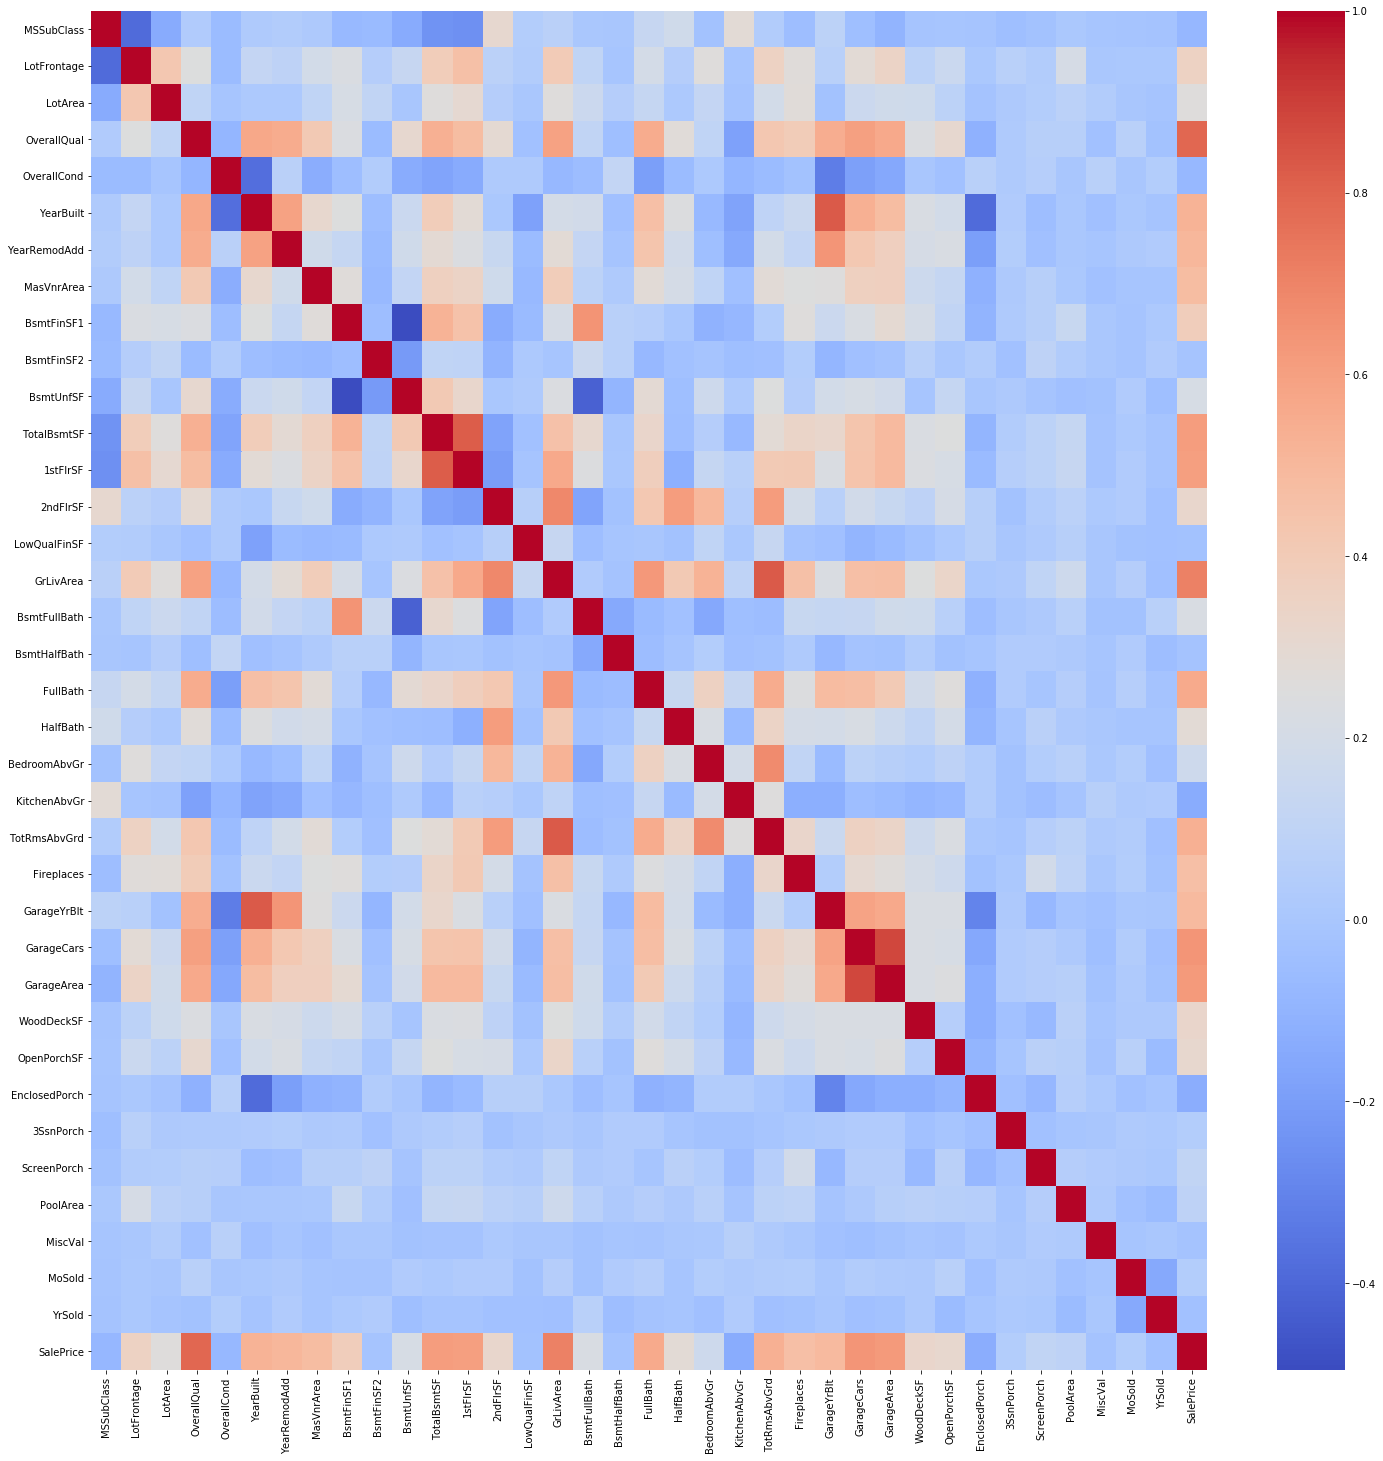

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap = "coolwarm")

Based on the heatmap, the OverallCondition, GarageCars, GarageArea, GrLivArea, TotalBsmtSF,  1stFlrSF have the strongest correlation with the sale price of the houses

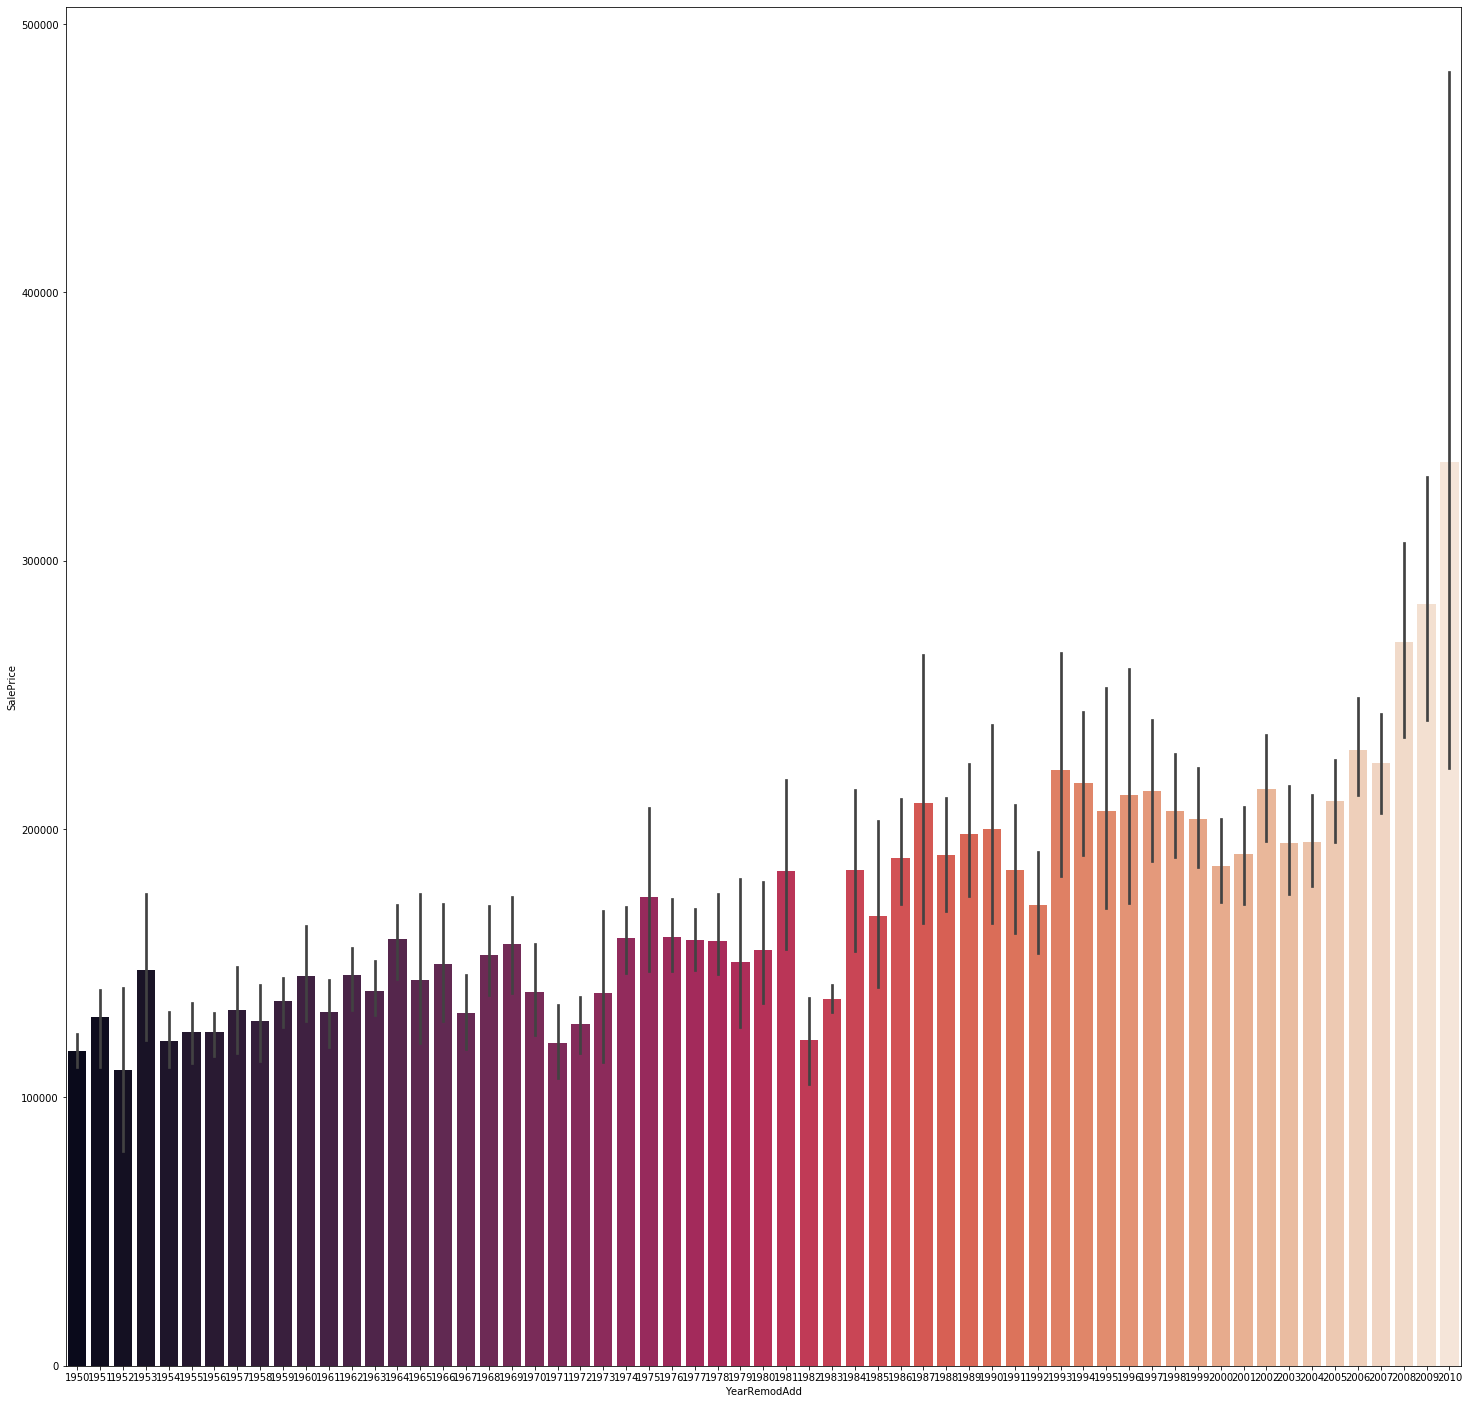

In [19]:
plt.figure(figsize=(25,25))
sns.barplot(x='YearRemodAdd', y='SalePrice', data=df, palette="rocket")

In [88]:
yrFeat = [feat for feat in df.columns if 'Yr' in feat or 'Year' in feat or 'Age' in feat]
yrFeat

['YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'YrSold',
 'YearSinceRemodel',
 'HouseAge',
 'GarageAge']

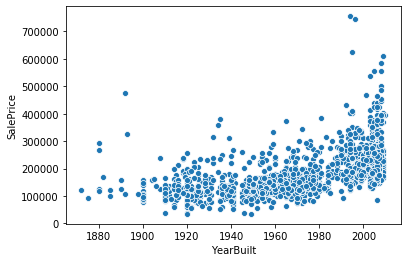

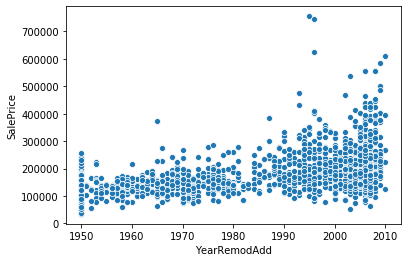

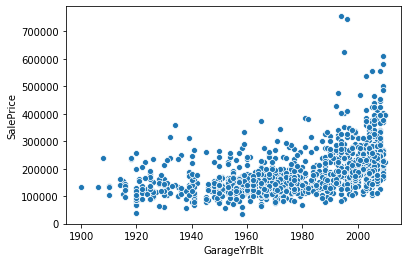

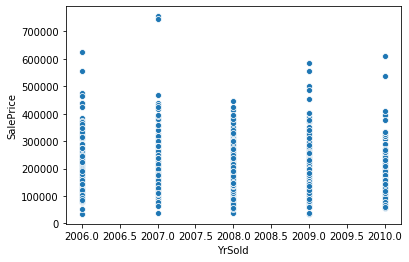

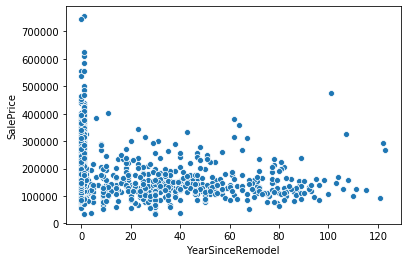

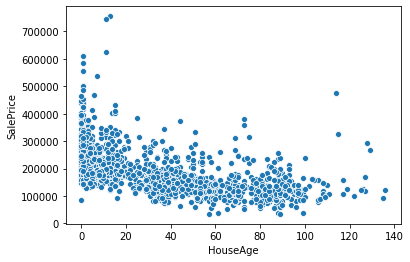

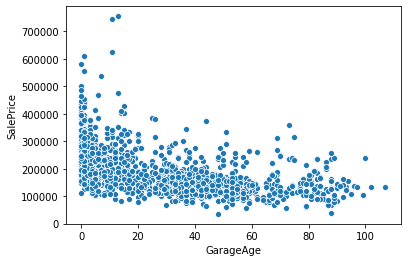

In [89]:
for feat in yrFeat:
    sns.scatterplot(x = feat, y = 'SalePrice', data = df)
    plt.show()

Add additional year features, such that we eliminate the year values and replace them with raw difference from the year built or year sold

In [22]:
df['YearSinceRemodel'] = df['YearRemodAdd'] - df['YearBuilt']

In [23]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

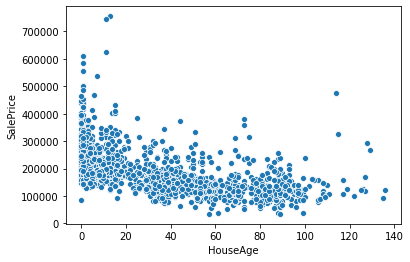

In [24]:
sns.scatterplot(x = 'HouseAge', y = 'SalePrice', data = df)
plt.show()

In [25]:
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

Reevaluate numerical features

In [43]:
numFeat = [feat for feat in df.columns if df[feat].dtype != 'O']

In [27]:
for feat in numFeat:
    print(feat , "Unique Values: ", df[feat].nunique())

MSSubClass Unique Values:  15
LotFrontage Unique Values:  110
LotArea Unique Values:  1073
OverallQual Unique Values:  10
OverallCond Unique Values:  9
YearBuilt Unique Values:  112
YearRemodAdd Unique Values:  61
MasVnrArea Unique Values:  327
BsmtFinSF1 Unique Values:  637
BsmtFinSF2 Unique Values:  144
BsmtUnfSF Unique Values:  780
TotalBsmtSF Unique Values:  721
1stFlrSF Unique Values:  753
2ndFlrSF Unique Values:  417
LowQualFinSF Unique Values:  24
GrLivArea Unique Values:  861
BsmtFullBath Unique Values:  4
BsmtHalfBath Unique Values:  3
FullBath Unique Values:  4
HalfBath Unique Values:  3
BedroomAbvGr Unique Values:  8
KitchenAbvGr Unique Values:  4
TotRmsAbvGrd Unique Values:  12
Fireplaces Unique Values:  4
GarageYrBlt Unique Values:  97
GarageCars Unique Values:  5
GarageArea Unique Values:  441
WoodDeckSF Unique Values:  274
OpenPorchSF Unique Values:  202
EnclosedPorch Unique Values:  120
3SsnPorch Unique Values:  20
ScreenPorch Unique Values:  76
PoolArea Unique Values: 

Split numerical features into continous and discrete numerical features. If more than 25, they will be categorized as continous, else, discrete

In [28]:
continousFeatures=[feat for feat in numFeat if df[feat].nunique()>25]
discreteFeatures=[feat for feat in numFeat if not df[feat].nunique()>25]       

In [29]:
len(discreteFeatures)

18

In [30]:
len(continousFeatures)

22

In [31]:
len(numFeat)

40

In [32]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearSinceRemodel,HouseAge,GarageAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,0,5,5.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,0,31,31.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,1,7,7.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,55,91,8.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,0,8,8.0


Will focus on categorical features now. Numerical feature will be explored furthur later

In [33]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [34]:
for feat in catFeat:
    print(feat, ":", df[feat].value_counts())

MSZoning : RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street : Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley : Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape : Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour : Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities : AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig : Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope : Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood : NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     

In [35]:
for feat in catFeat:
    print(feat, ":", df[feat].nunique())

MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
PoolQC : 3
Fence : 4
MiscFeature : 4
SaleType : 9
SaleCondition : 6


In [50]:
nullCats = [feat for feat in catFeat if df[feat].isnull().sum()>0]
print(nullCats)
print(len(nullCats))

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
16


Here we have a few "False" NAs where the categorical value is actually no alley or none instead of NA. We will fill those columns with appropriate values here. 

In [52]:
df['MiscFeature'].fillna('No Misc Feature', inplace = True)

In [54]:
df['Alley'].fillna('No alley', inplace = True)

In [63]:
df['PoolQC'].fillna('No pool', inplace = True)

In [65]:
df['Fence'].fillna('No fence', inplace = True)

In [68]:
df['FireplaceQu'].fillna('No fireplace', inplace = True)

In [59]:
for feat in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[feat].fillna('No garage', inplace = True)

In [61]:
for feat in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[feat].fillna('No basement', inplace = True)

In [69]:
for feat in nullCats:
    print(feat, ":", df[feat].isnull().mean()*100)

Alley : 0.0
MasVnrType : 0.547945205479452
BsmtQual : 0.0
BsmtCond : 0.0
BsmtExposure : 0.0
BsmtFinType1 : 0.0
BsmtFinType2 : 0.0
Electrical : 0.0684931506849315
FireplaceQu : 0.0
GarageType : 0.0
GarageFinish : 0.0
GarageQual : 0.0
GarageCond : 0.0
PoolQC : 0.0
Fence : 0.0
MiscFeature : 0.0


For the 2 Null categorical columns, we will impute with the mode

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
catimputer_mode = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')

In [73]:
#Recalculate missing categories
nullCats = [feat for feat in catFeat if df[feat].isnull().sum()>0]
print(nullCats)

['MasVnrType', 'Electrical']


In [83]:
catimputer_mode.fit(df[nullCats])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [80]:
df[nullCats] = catimputer_mode.transform(df[nullCats])

We have now taken care of the missing and null values in the categorical features

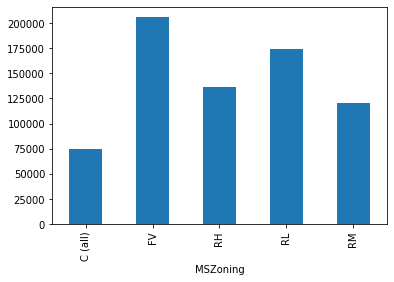

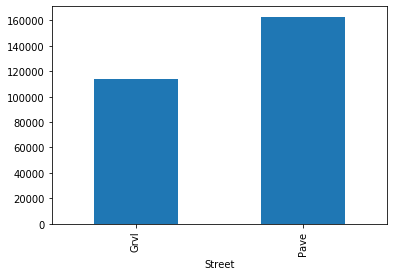

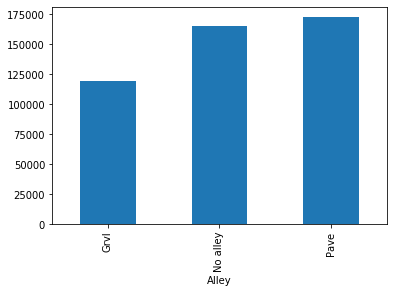

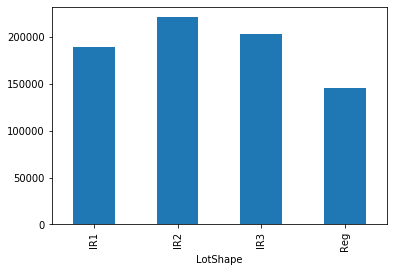

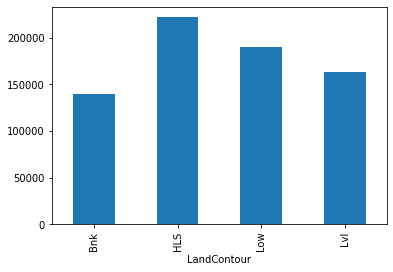

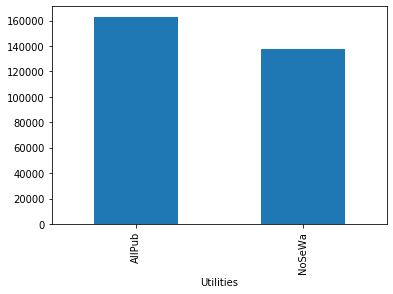

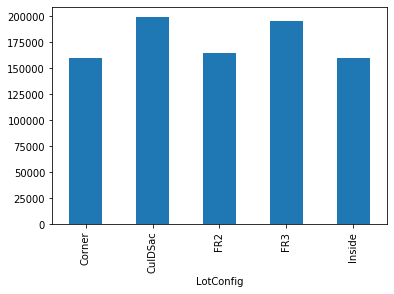

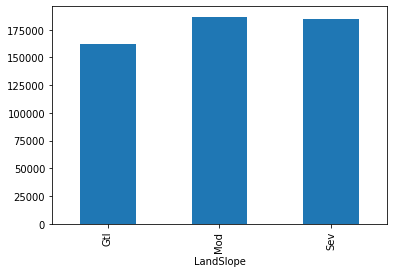

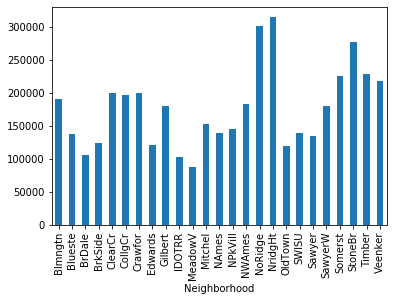

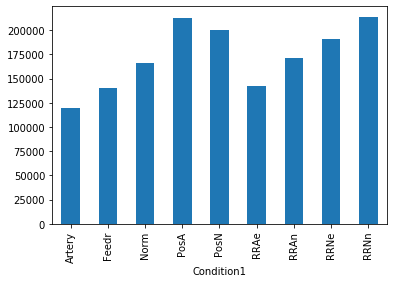

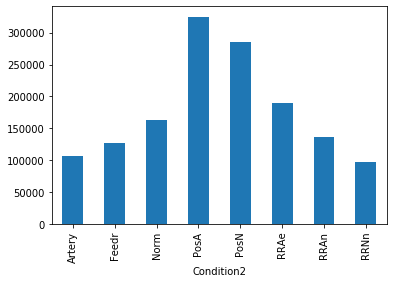

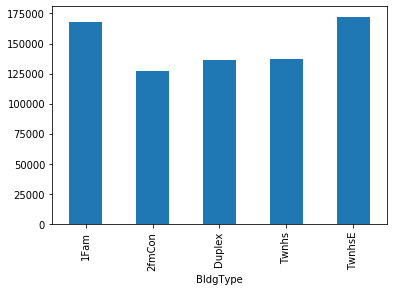

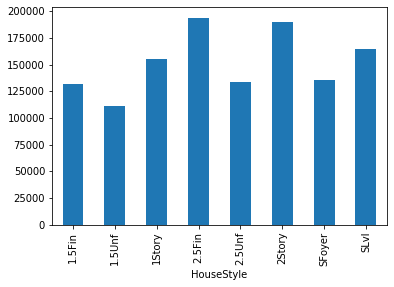

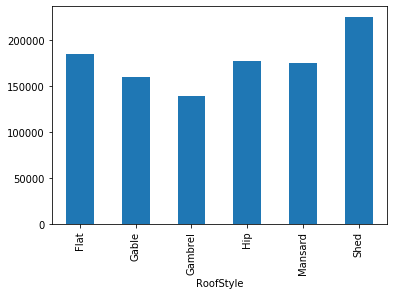

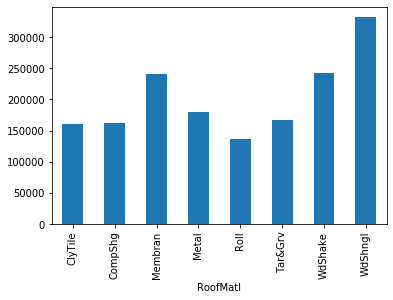

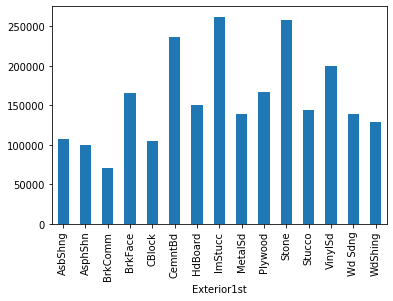

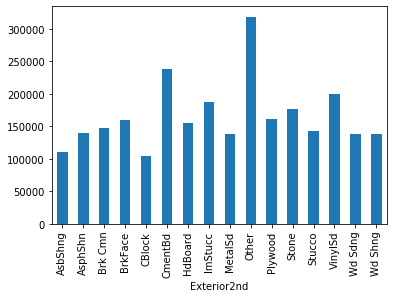

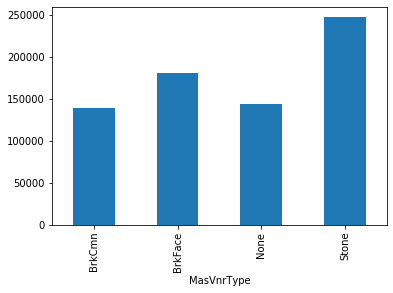

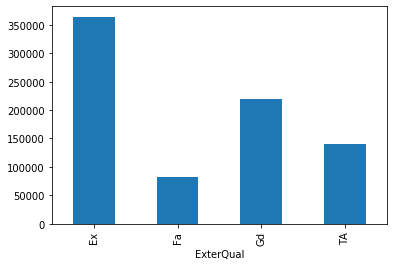

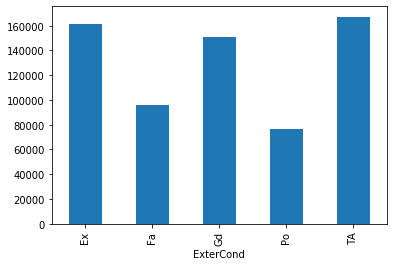

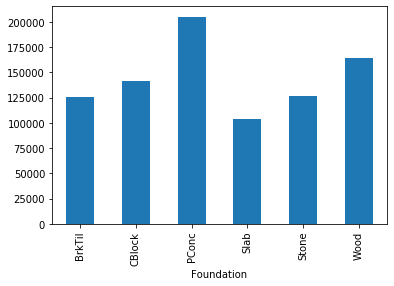

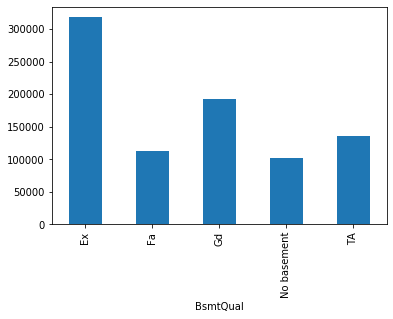

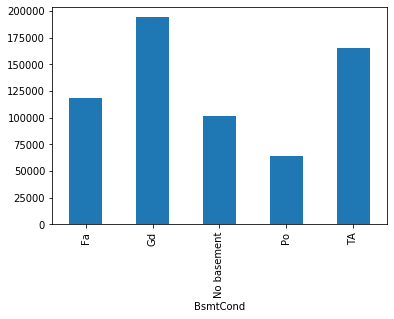

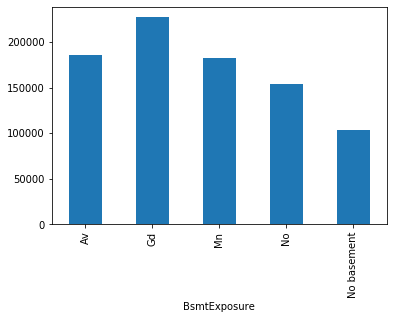

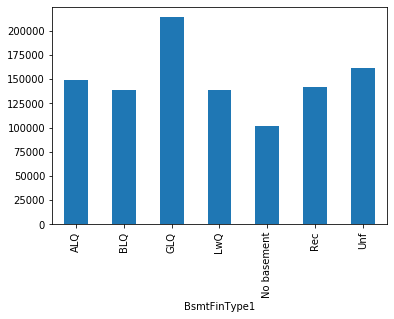

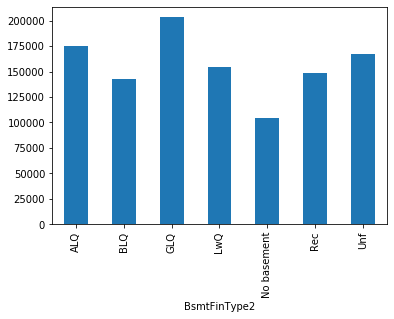

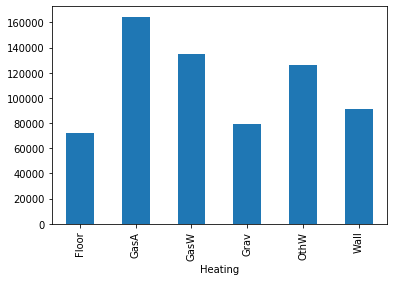

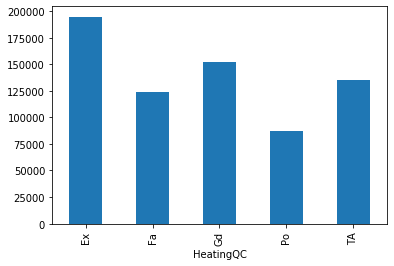

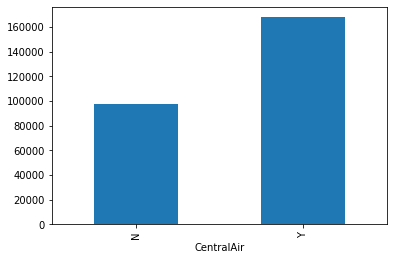

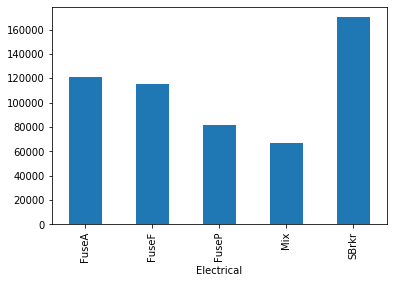

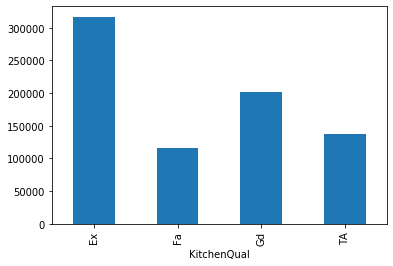

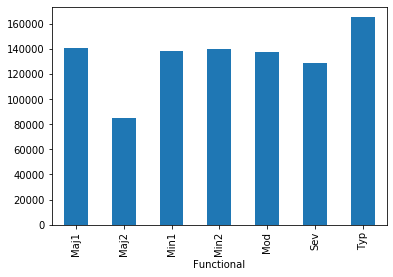

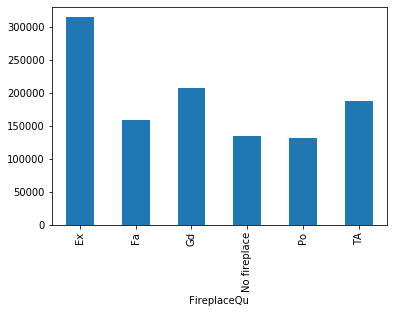

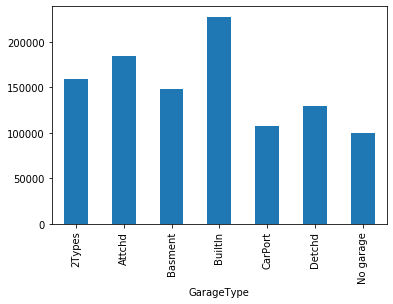

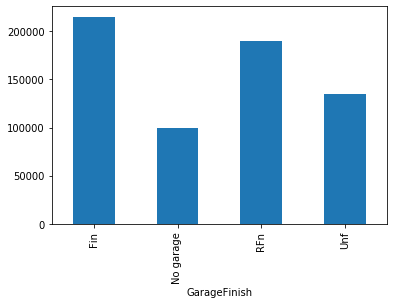

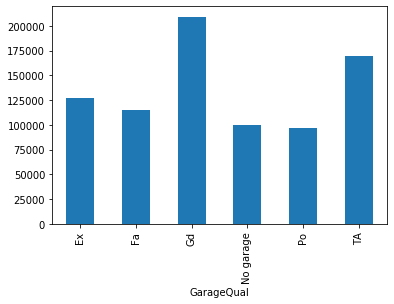

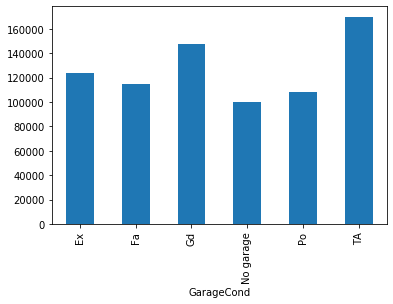

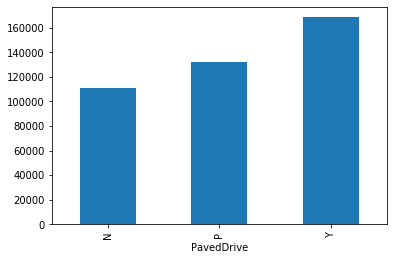

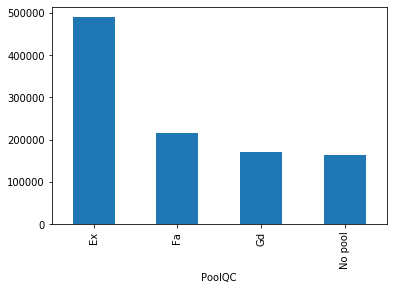

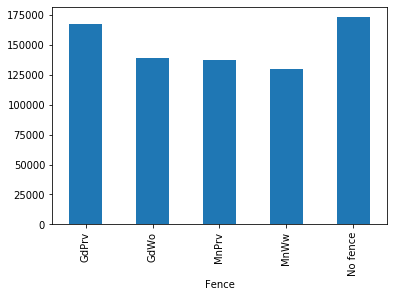

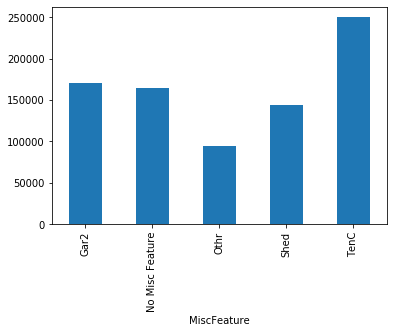

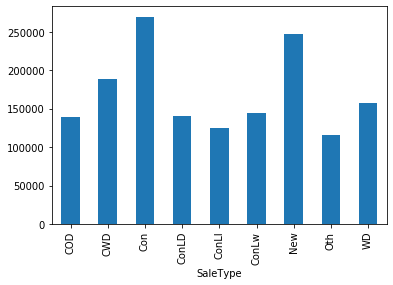

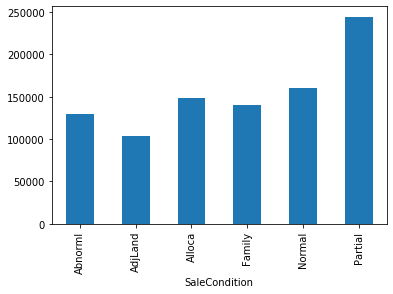

In [82]:
for feat in catFeat:
    df.groupby(feat)['SalePrice'].median().plot(kind='bar')
    plt.show()

In [101]:
nullNums = [feat for feat in numFeat if df[feat].isnull().sum()>0]
print(nullNums)
for feat in nullNums:
    print(feat, ":", df[feat].isnull().mean()*100)

['LotFrontage', 'MasVnrArea']
LotFrontage : 17.73972602739726
MasVnrArea : 0.547945205479452


    The garage age and year built null values are equal in proportion to the categorical features and the reason is these houses do not have a garage. Hence, I will fill these 2 with the value 0. Though a garage age of zero could also signify a new garage, but that is a risk we are taking

In [90]:
for feat in ('GarageYrBlt', 'GarageAge'):
    df[feat].fillna(0, inplace = True)

In [96]:
meanimputer = SimpleImputer(missing_values = np.nan, strategy='mean')

In [102]:
meanimputer.fit(df[nullNums])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [103]:
df[nullNums] = meanimputer.transform(df[nullNums])

In [104]:
for feat in nullNums:
    print(feat, ":", df[feat].isnull().mean()*100)

LotFrontage : 0.0
MasVnrArea : 0.0


We have now imputed the numerical features. Thus the dataset does not have any missing values anymore. We now go ahead an encode the categorical features